<a href="https://colab.research.google.com/github/cruzmarcela02/ciencia-de-datos/blob/main/TP2-competitive/colab-modelos/analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### CARGA ARCHIVO

In [ ]:
# 1. https://drive.google.com/file/d/16lG3-nbA8kzsgU9FdRdv_n0uFC28Xr-H/view?usp=drive_link
id='16lG3-nbA8kzsgU9FdRdv_n0uFC28Xr-H'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('item_categories.csv')

In [ ]:
# 2. https://drive.google.com/file/d/1c7mcCGabwq1dM5s82yL0ZaPU6Dzr_489/view?usp=drive_link
id='1c7mcCGabwq1dM5s82yL0ZaPU6Dzr_489'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('items.csv')

In [ ]:
# 3. https://drive.google.com/file/d/1dYfyImjwbSLzS6wu476oc6RTr6x-QU7Y/view?usp=drive_link
id='1dYfyImjwbSLzS6wu476oc6RTr6x-QU7Y'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sales_train.csv')

In [ ]:
# 4. https://drive.google.com/file/d/1gCwL27K8S9T3jDFYzPlYs141gG-KNgE3/view?usp=drive_link
id='1gCwL27K8S9T3jDFYzPlYs141gG-KNgE3'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('sample_submission.csv')

In [ ]:
# 5. https://drive.google.com/file/d/1x2qB98Dz10JJLXMY2viNkDtIgMljW4uv/view?usp=drive_link
id='1x2qB98Dz10JJLXMY2viNkDtIgMljW4uv'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('shops.csv')

In [ ]:
# 6. https://drive.google.com/file/d/19BxloYpVZOT-C2Y2vZbrVZdQ9d0u3UNu/view?usp=drive_link
id='19BxloYpVZOT-C2Y2vZbrVZdQ9d0u3UNu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test.csv')

### OBSERVACION DE ARCHIVOS

In [ ]:
categories_id = pd.read_csv('item_categories.csv')
categories_id

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
items = pd.read_csv('items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
sales_train = pd.read_csv('sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00


In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,ID,item_cnt_month
0,0,0.50
1,1,0.50
2,2,0.50
3,3,0.50
4,4,0.50


In [ ]:
shops = pd.read_csv('shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### CHUSMEO

In [ ]:
categories_id

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
categories_id.item_category_name.unique().size # No se repiten las categorias

84

In [ ]:
categories_id.item_category_id.unique() # Datos validos (?todo es valido hay que analizar nomas..¿)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00


In [ ]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
sales_train.item_price.describe() # Precios negativos?

count           2,935,849.00
mean                  890.85
std                 1,729.80
min                    -1.00
25%                   249.00
50%                   399.00
75%                   999.00
max               307,980.00
Name: item_price, dtype: float64

In [ ]:
sales_train.item_price.value_counts()

item_price
  299.00    291352
  399.00    242603
  149.00    218432
  199.00    184044
  349.00    101461
             ...  
1,408.15         1
  505.67         1
  305.38         1
  499.22         1
4,040.00         1
Name: count, Length: 19993, dtype: int64

In [ ]:
sales_train.loc[sales_train.item_price > 0] # Hay un valor negativo

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
sales_train.loc[sales_train.date == '15.05.2013']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
439929,15.05.2013,4,27,21376,399.00,1.00
439990,15.05.2013,4,27,18424,199.00,1.00
439991,15.05.2013,4,27,18461,299.00,1.00
440022,15.05.2013,4,27,18486,299.00,1.00
440084,15.05.2013,4,27,19169,749.00,1.00
...,...,...,...,...,...,...
531438,15.05.2013,4,6,2416,449.00,1.00
531472,15.05.2013,4,6,2447,"1,999.00",1.00
531490,15.05.2013,4,6,1987,299.00,1.00
531495,15.05.2013,4,6,1777,299.00,1.00


In [ ]:
sales_train.item_cnt_day.describe()

count           2,935,849.00
mean                    1.24
std                     2.62
min                   -22.00
25%                     1.00
50%                     1.00
75%                     1.00
max                 2,169.00
Name: item_cnt_day, dtype: float64

In [ ]:
sales_train.item_cnt_day.unique()

array([ 1.000e+00, -1.000e+00,  3.000e+00,  2.000e+00,  4.000e+00,
        5.000e+00,  1.300e+01,  7.000e+00,  6.000e+00,  8.000e+00,
        1.000e+01,  1.100e+01,  3.000e+01,  2.200e+01,  1.400e+01,
        1.500e+01,  9.000e+00,  1.200e+01,  1.700e+01,  1.900e+01,
        2.000e+01, -5.000e+00, -6.000e+00, -3.000e+00, -2.000e+00,
        1.600e+01,  6.400e+01,  1.800e+01,  2.900e+01,  2.600e+01,
        3.900e+01,  2.100e+01,  2.700e+01,  5.300e+01,  2.500e+01,
        2.300e+01,  2.400e+01,  4.000e+01,  2.800e+01,  3.100e+01,
        3.600e+01, -4.000e+00,  3.200e+01,  3.500e+01,  4.100e+01,
        8.800e+01,  4.400e+01,  5.200e+01,  5.600e+01,  3.800e+01,
        3.400e+01,  5.700e+01,  6.900e+01,  3.700e+01,  4.700e+01,
        5.000e+01,  4.800e+01,  3.300e+01,  6.100e+01,  8.000e+01,
        4.200e+01,  8.200e+01,  2.000e+02,  1.000e+02,  7.600e+01,
        7.700e+01,  1.070e+02,  4.600e+01,  4.900e+01,  7.000e+01,
        5.500e+01,  6.000e+01,  4.500e+01,  7.100e+01,  6.500e

In [ ]:
sales_train.loc[sales_train.item_cnt_day == -5] #Borrar

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
59155,10.01.2013,0,12,1590,"2,599.00",-5.00
93576,21.01.2013,0,43,20384,"1,599.00",-5.00
2458733,18.02.2015,25,2,16790,"2,899.00",-5.00
2619997,29.05.2015,28,6,4894,"3,999.00",-5.00


In [ ]:
sales_train = sales_train[sales_train['item_price'] > 0]
 # Pues hay item_cnt_day menores a 0

In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
sales_train = sales_train[sales_train['item_cnt_day'] >= 0] #elimino lo negativo

In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
5,10.01.2013,0,25,2564,349.00,1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
a = sales_train.shop_id.unique()
a.sort()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [ ]:
sales_train.shop_id.value_counts()

shop_id
31    235185
25    185788
54    143124
28    142018
57    117114
42    109002
27    105209
6      82402
58     71268
56     69378
46     66219
50     65043
19     63700
15     59381
35     58317
21     58008
7      57977
47     56502
26     53776
18     53095
24     52929
53     52758
16     52595
30     50725
29     49074
38     45851
22     45337
51     44433
52     43359
59     41971
41     41885
37     39484
44     39365
43     39071
4      38118
5      38094
14     36859
45     35788
55     34767
12     34264
2      25911
3      25413
17     22870
48     21523
10     21397
13     17824
49     15807
39     13403
0       9857
32      7912
23      6946
34      5727
1       5678
33      5005
40      4244
9       3743
8       3406
20      1791
11       499
36       303
Name: count, dtype: int64

In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00
5,10.01.2013,0,25,2564,349.00,1.00
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.00
2935845,09.10.2015,33,25,7460,299.00,1.00
2935846,14.10.2015,33,25,7459,349.00,1.00
2935847,22.10.2015,33,25,7440,299.00,1.00


In [ ]:
sales_train.item_id.value_counts()

item_id
20949    31337
5822      9404
17717     9067
2808      7470
4181      6850
         ...  
2541         1
20471        1
8196         1
8435         1
7640         1
Name: count, Length: 21804, dtype: int64

In [ ]:
sales_train.item_cnt_day.value_counts()

item_cnt_day
    1.00    2629371
    2.00     194201
    3.00      47350
    4.00      19685
    5.00      10474
             ...   
  501.00          1
  112.00          1
  164.00          1
  240.00          1
2,169.00          1
Name: count, Length: 189, dtype: int64

In [ ]:
sales_train.item_cnt_day.describe()

count           2,928,492.00
mean                    1.25
std                     2.62
min                     1.00
25%                     1.00
50%                     1.00
75%                     1.00
max                 2,169.00
Name: item_cnt_day, dtype: float64

In [ ]:
sales_train.groupby(['shop_id','item_id'])['item_id'].count()

shop_id  item_id
0        30          9
         31          7
         32         11
         33          6
         35         12
                    ..
59       22154       1
         22155       1
         22162      16
         22164       6
         22167       4
Name: item_id, Length: 424098, dtype: int64

In [ ]:
sales_train.count()

date              2928492
date_block_num    2928492
shop_id           2928492
item_id           2928492
item_price        2928492
item_cnt_day      2928492
dtype: int64

In [ ]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,"2,928,492.00","2,928,492.00","2,928,492.00","2,928,492.00","2,928,492.00"
mean,14.57,33.00,"10,200.28",889.47,1.25
std,9.42,16.23,"6,324.40","1,727.50",2.62
min,0.00,0.00,0.00,0.07,1.00
25%,7.00,22.00,"4,477.00",249.00,1.00
50%,14.00,31.00,"9,355.00",399.00,1.00
75%,23.00,47.00,"15,691.00",999.00,1.00
max,33.00,59.00,"22,169.00","307,980.00","2,169.00"


In [ ]:
sales_train.item_cnt_day.value_counts()

item_cnt_day
    1.00    2629371
    2.00     194201
    3.00      47350
    4.00      19685
    5.00      10474
             ...   
  501.00          1
  112.00          1
  164.00          1
  240.00          1
2,169.00          1
Name: count, Length: 189, dtype: int64

# Merges

In [ ]:
sales_train_items = sales_train.merge(items, on='item_id', how='left')

In [ ]:
sales_train_shops = sales_train.merge(shops, on='shop_id', how='left')

In [ ]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y') #Extraemos características temporales de date
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month
sales_train['day'] = sales_train['date'].dt.day
sales_train['day_of_week'] = sales_train['date'].dt.dayofweek

In [ ]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,day_of_week
0,2013-01-02,0,59,22154,999.00,1.00,2013,1,2,2
1,2013-01-03,0,25,2552,899.00,1.00,2013,1,3,3
3,2013-01-06,0,25,2554,"1,709.05",1.00,2013,1,6,6
4,2013-01-15,0,25,2555,"1,099.00",1.00,2013,1,15,1
5,2013-01-10,0,25,2564,349.00,1.00,2013,1,10,3
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.00,2015,10,10,5
2935845,2015-10-09,33,25,7460,299.00,1.00,2015,10,9,4
2935846,2015-10-14,33,25,7459,349.00,1.00,2015,10,14,2
2935847,2015-10-22,33,25,7440,299.00,1.00,2015,10,22,3


In [ ]:
monthly_sales = sales_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index() #Creamos un dataframe con las ventas mensuales agregadas por tienda y artículo.
monthly_sales.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

In [ ]:
monthly_sales['item_cnt_month_mean'] = monthly_sales.groupby(['shop_id', 'item_id'])['item_cnt_month'].transform('mean') #estadisticas adicionales
monthly_sales['item_price_mean'] = sales_train.groupby(['item_id'])['item_price'].transform('mean')

# Visus

In [ ]:
heatmap = sales_train[['shop_id','date','item_cnt_day']]
heatmap = heatmap.groupby(['shop_id','date']).sum().reset_index()

In [ ]:
heatmap.pivot_table(values='item_cnt_day', index='shop_id', columns='date', fill_value=0)

date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31
shop_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,203,352,292,209,132,263,181,184,...,0,0,0,0,0,0,0,0,0,0
1,0,0,204,39,200,143,0,142,87,66,...,0,0,0,0,0,0,0,0,0,0
2,24,79,96,80,72,63,69,37,31,31,...,13,33,52,39,9,7,23,19,19,38
3,0,64,43,44,29,42,55,36,10,13,...,2,17,36,14,12,12,8,13,28,32
4,0,167,143,132,116,85,102,80,54,33,...,17,34,42,30,17,15,17,21,24,21
5,0,0,0,0,0,0,0,0,0,0,...,25,37,45,53,29,15,21,19,32,37
6,0,174,191,188,144,130,84,108,121,99,...,59,69,66,68,46,37,49,45,55,87
7,89,208,158,117,125,102,89,89,58,48,...,16,65,77,50,17,23,22,30,48,69
8,50,138,121,106,99,72,67,42,31,27,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#plt.figure(figsize=(8,6))
#s=sns.heatmap(pasajeros_pivot_ordenado, linewidth=0.5, linecolor='darkblue', annot=True, cmap='crest', fmt='g')
#s.set_xlabel('Duración de vuelos', fontsize=14)
#s.set_ylabel('Horarios', fontsize=14)
#plt.title('Cantidad de Pasajeros por Horarios y Duración', loc='left', color='darkblue', size=14)

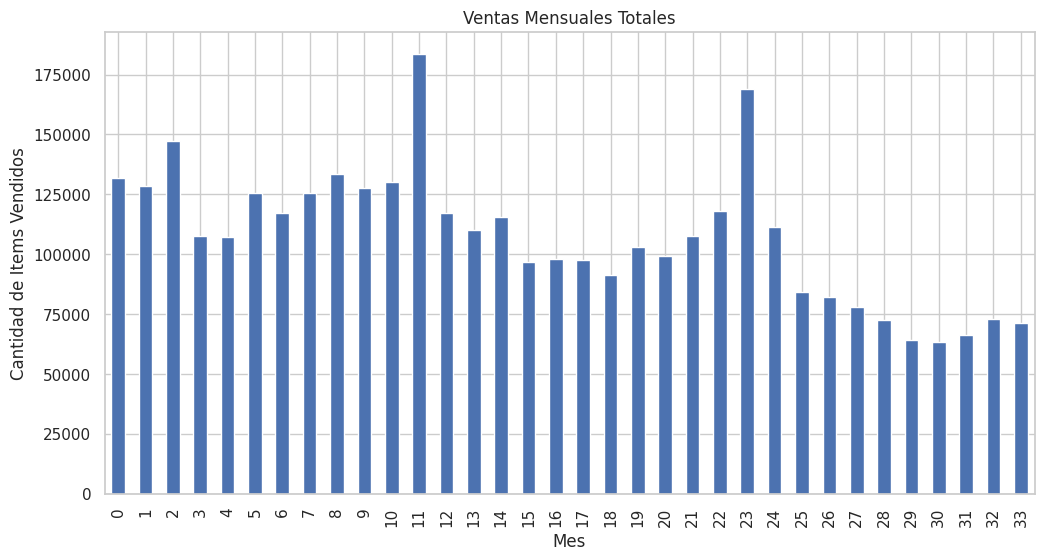

In [ ]:
plt.figure(figsize=(12,6))
monthly_sales.groupby('date_block_num')['item_cnt_month'].sum().plot(kind='bar')
plt.title('Ventas Mensuales Totales')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Items Vendidos')
plt.show()

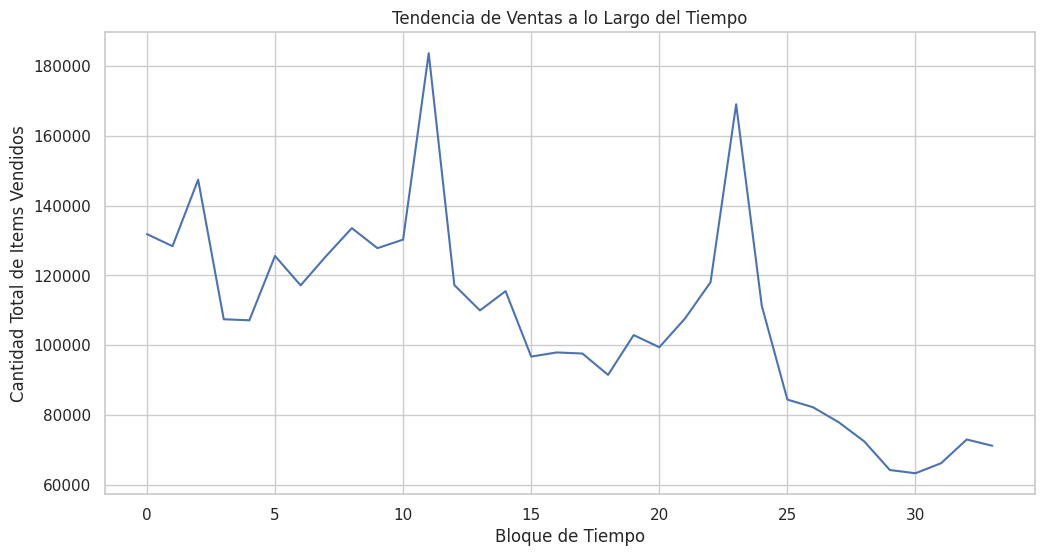

In [ ]:
# Analizar la tendencia de ventas a lo largo del tiempo para ver si hay estacionalidad o tendencias.
plt.figure(figsize=(12,6))
sales_over_time = sales_train.groupby('date_block_num')['item_cnt_day'].sum().reset_index()
plt.plot(sales_over_time['date_block_num'], sales_over_time['item_cnt_day'])
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Bloque de Tiempo')
plt.ylabel('Cantidad Total de Items Vendidos')
plt.show()

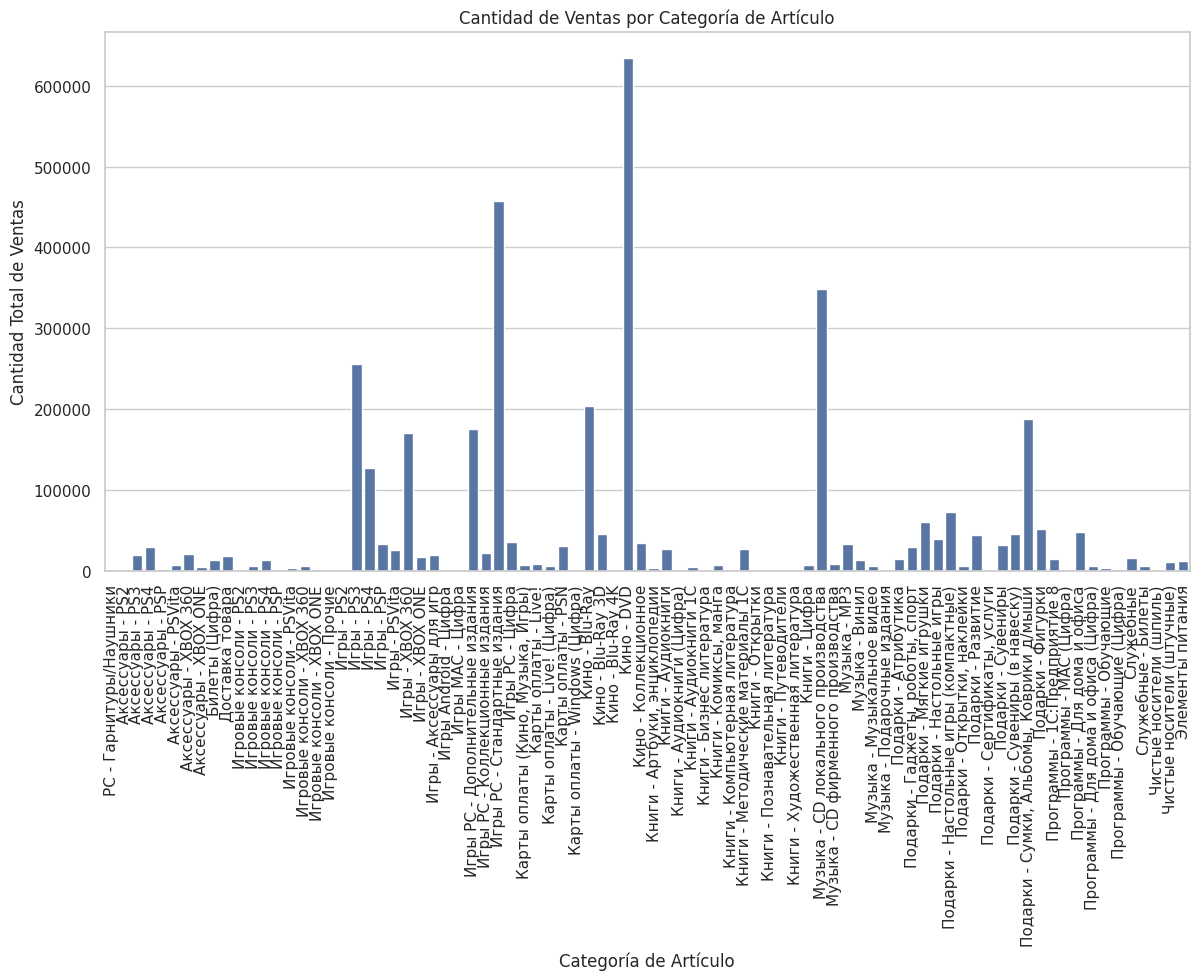

In [ ]:
#Esto te permite ver cuáles categorías de artículos son más populares
items_sales = sales_train.merge(items, on='item_id', how='left')
categories_sales = items_sales.groupby('item_category_id')['item_cnt_day'].sum().reset_index()
categories_sales = categories_sales.merge(categories_id, on='item_category_id', how='left')

plt.figure(figsize=(14,7))
sns.barplot(x='item_category_name', y='item_cnt_day', data=categories_sales)
plt.xticks(rotation=90)
plt.title('Cantidad de Ventas por Categoría de Artículo')
plt.xlabel('Categoría de Artículo')
plt.ylabel('Cantidad Total de Ventas')
plt.show()

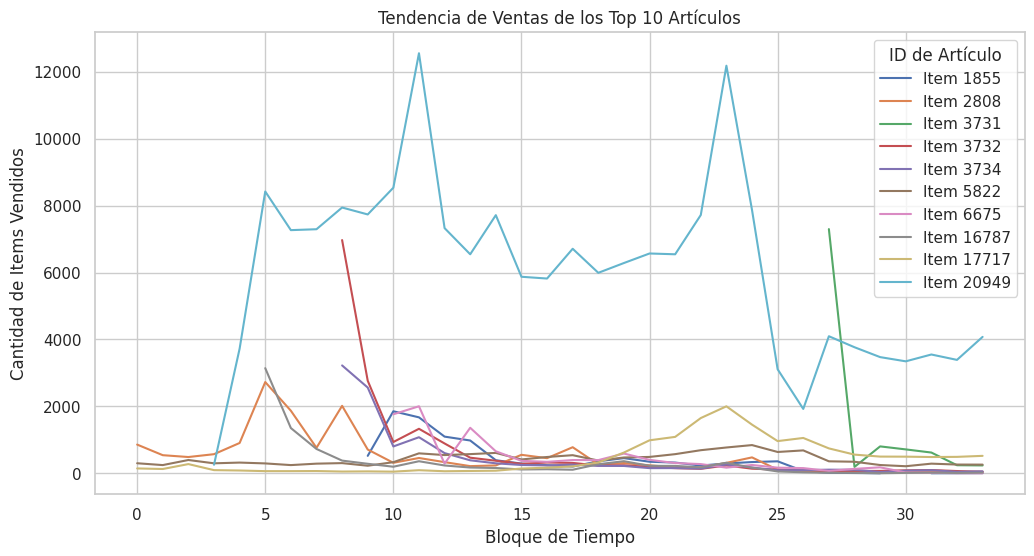

In [ ]:
#Esto muestra la tendencia de ventas a lo largo del tiempo de los artículos más vendidos

top_items = sales_train.groupby('item_id')['item_cnt_day'].sum().nlargest(10).index
top_sales = sales_train[sales_train['item_id'].isin(top_items)]
top_sales_trend = top_sales.groupby(['date_block_num', 'item_id'])['item_cnt_day'].sum().unstack()

plt.figure(figsize=(12,6))
for column in top_sales_trend:
    plt.plot(top_sales_trend.index, top_sales_trend[column], label=f'Item {column}')
plt.title('Tendencia de Ventas de los Top 10 Artículos')
plt.xlabel('Bloque de Tiempo')
plt.ylabel('Cantidad de Items Vendidos')
plt.legend(title='ID de Artículo')
plt.show()

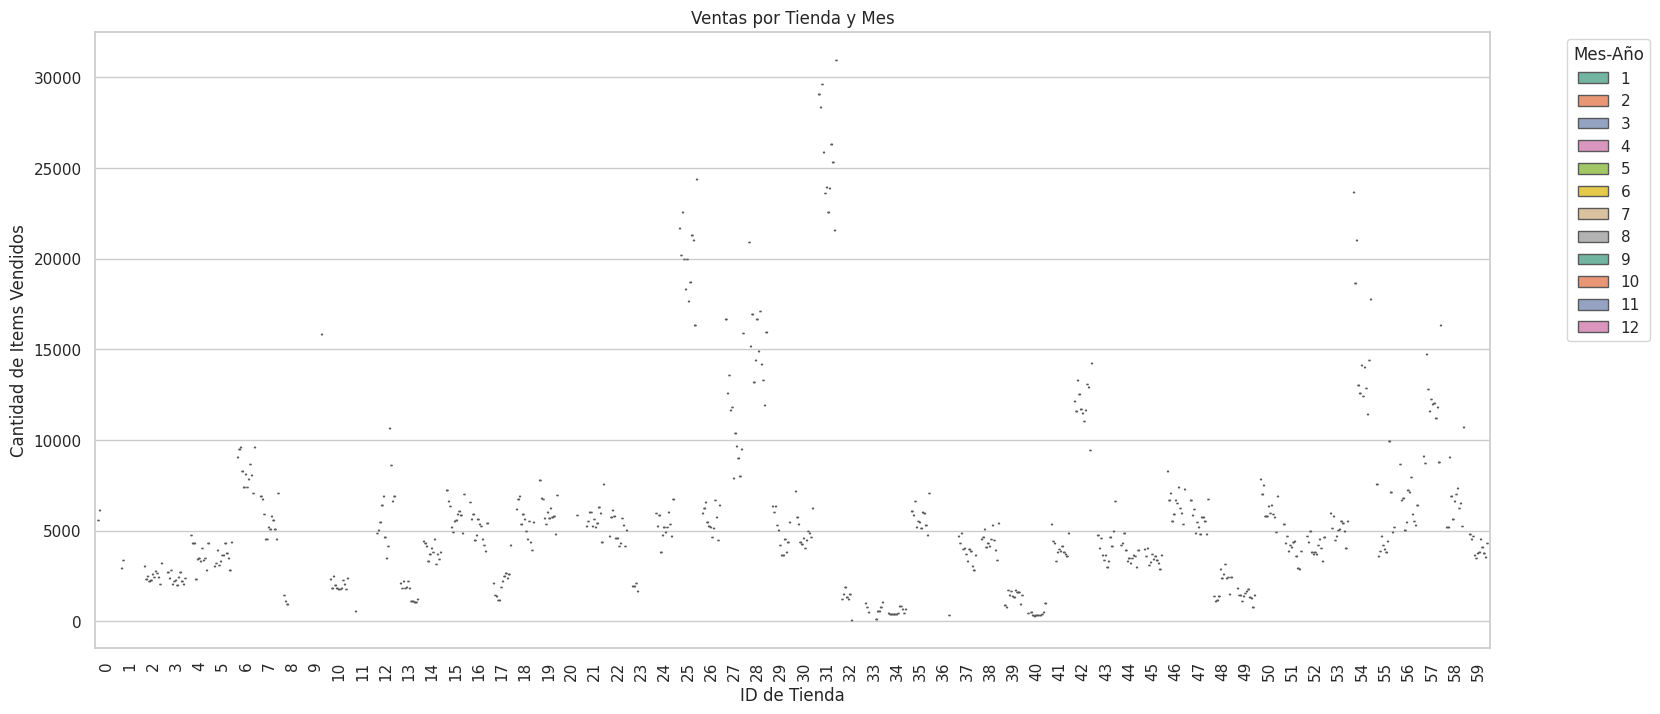

In [ ]:
sales_per_shop_month = sales_train.groupby(['shop_id', 'month']).agg({'item_cnt_day': 'sum'}).reset_index()

#comparar las ventas por tienda y mes puede mostrar cómo varían las ventas mensuales entre diferentes tiendas
plt.figure(figsize=(18,8))
sns.boxplot(x='shop_id', y='item_cnt_day', hue='month', data=sales_per_shop_month, palette="Set2")
plt.title('Ventas por Tienda y Mes')
plt.xlabel('ID de Tienda')
plt.ylabel('Cantidad de Items Vendidos')
plt.xticks(rotation=90)
plt.legend(title='Mes-Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


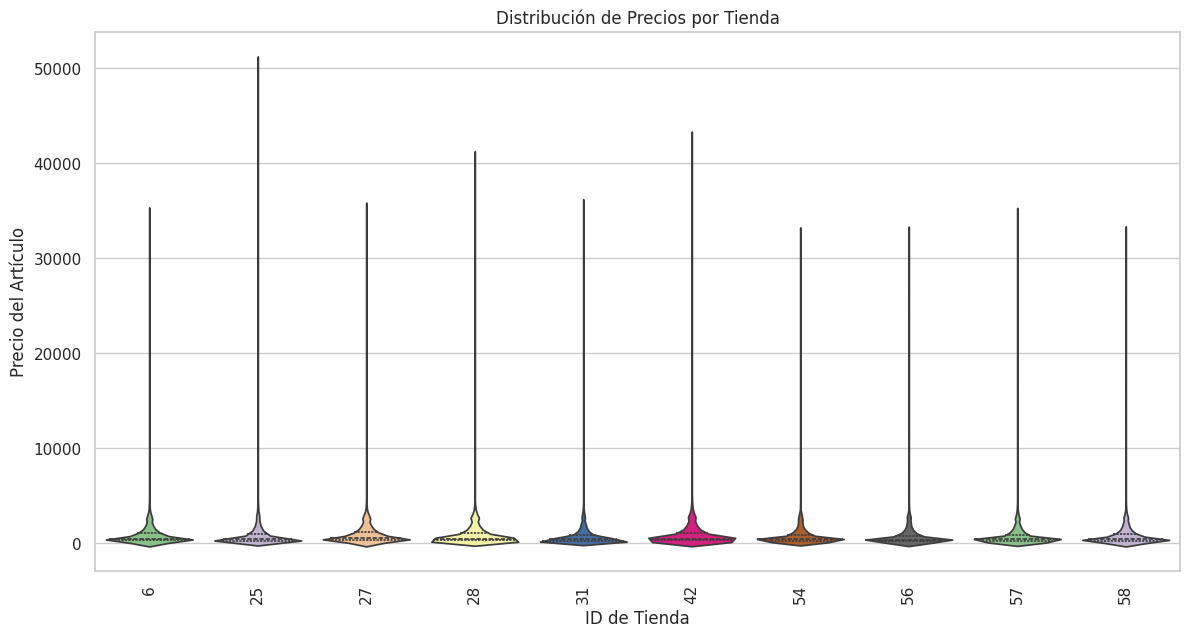

In [ ]:
# Violin Plot: Distribución de precios por tienda (filtrando las tiendas más activas)
top_shops = sales_train['shop_id'].value_counts().index[:10]
filtered_sales_train = sales_train[sales_train['shop_id'].isin(top_shops)]

plt.figure(figsize=(14,7))
ax = sns.violinplot(x='shop_id', y='item_price', data=filtered_sales_train, inner="quart", scale="count", palette='Accent')
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de Tienda')
plt.ylabel('Precio del Artículo')
plt.show()

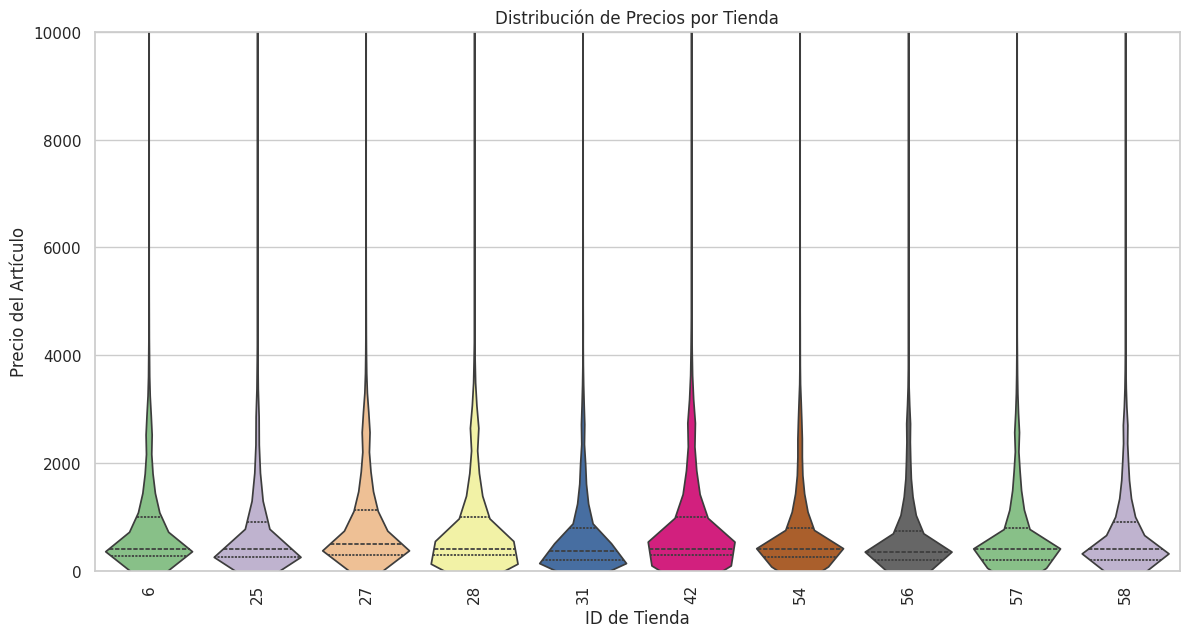

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.violinplot(x='shop_id', y='item_price', data=filtered_sales_train, inner="quart", scale="count", palette='Accent')
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de Tienda')
plt.ylabel('Precio del Artículo')
ax.set_ylim(0, 10000)
plt.show()

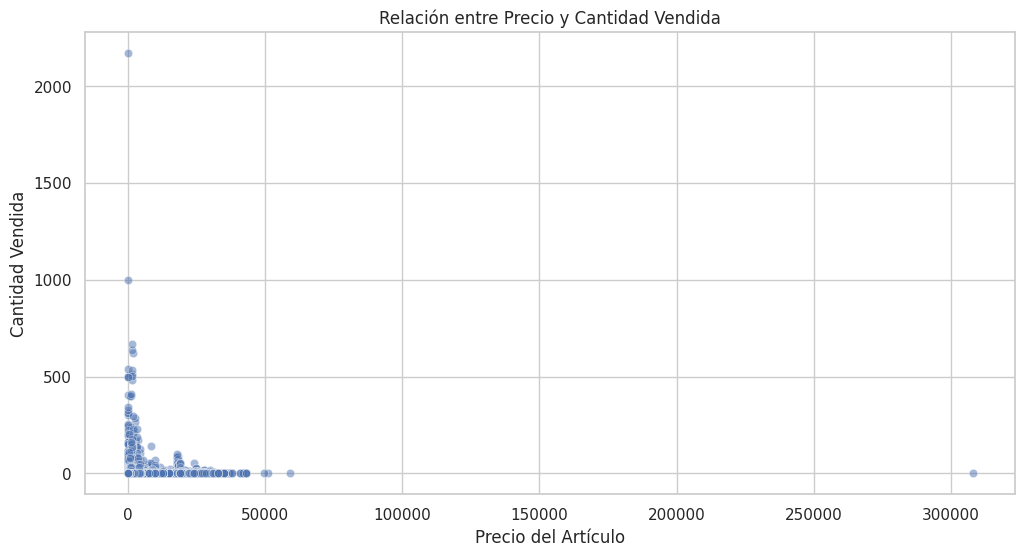

In [ ]:
#Relación entre precio y cantidad vendida

plt.figure(figsize=(12,6))
sns.scatterplot(x='item_price', y='item_cnt_day', data=sales_train, alpha=0.5)
plt.title('Relación entre Precio y Cantidad Vendida')
plt.xlabel('Precio del Artículo')
plt.ylabel('Cantidad Vendida')
plt.show()

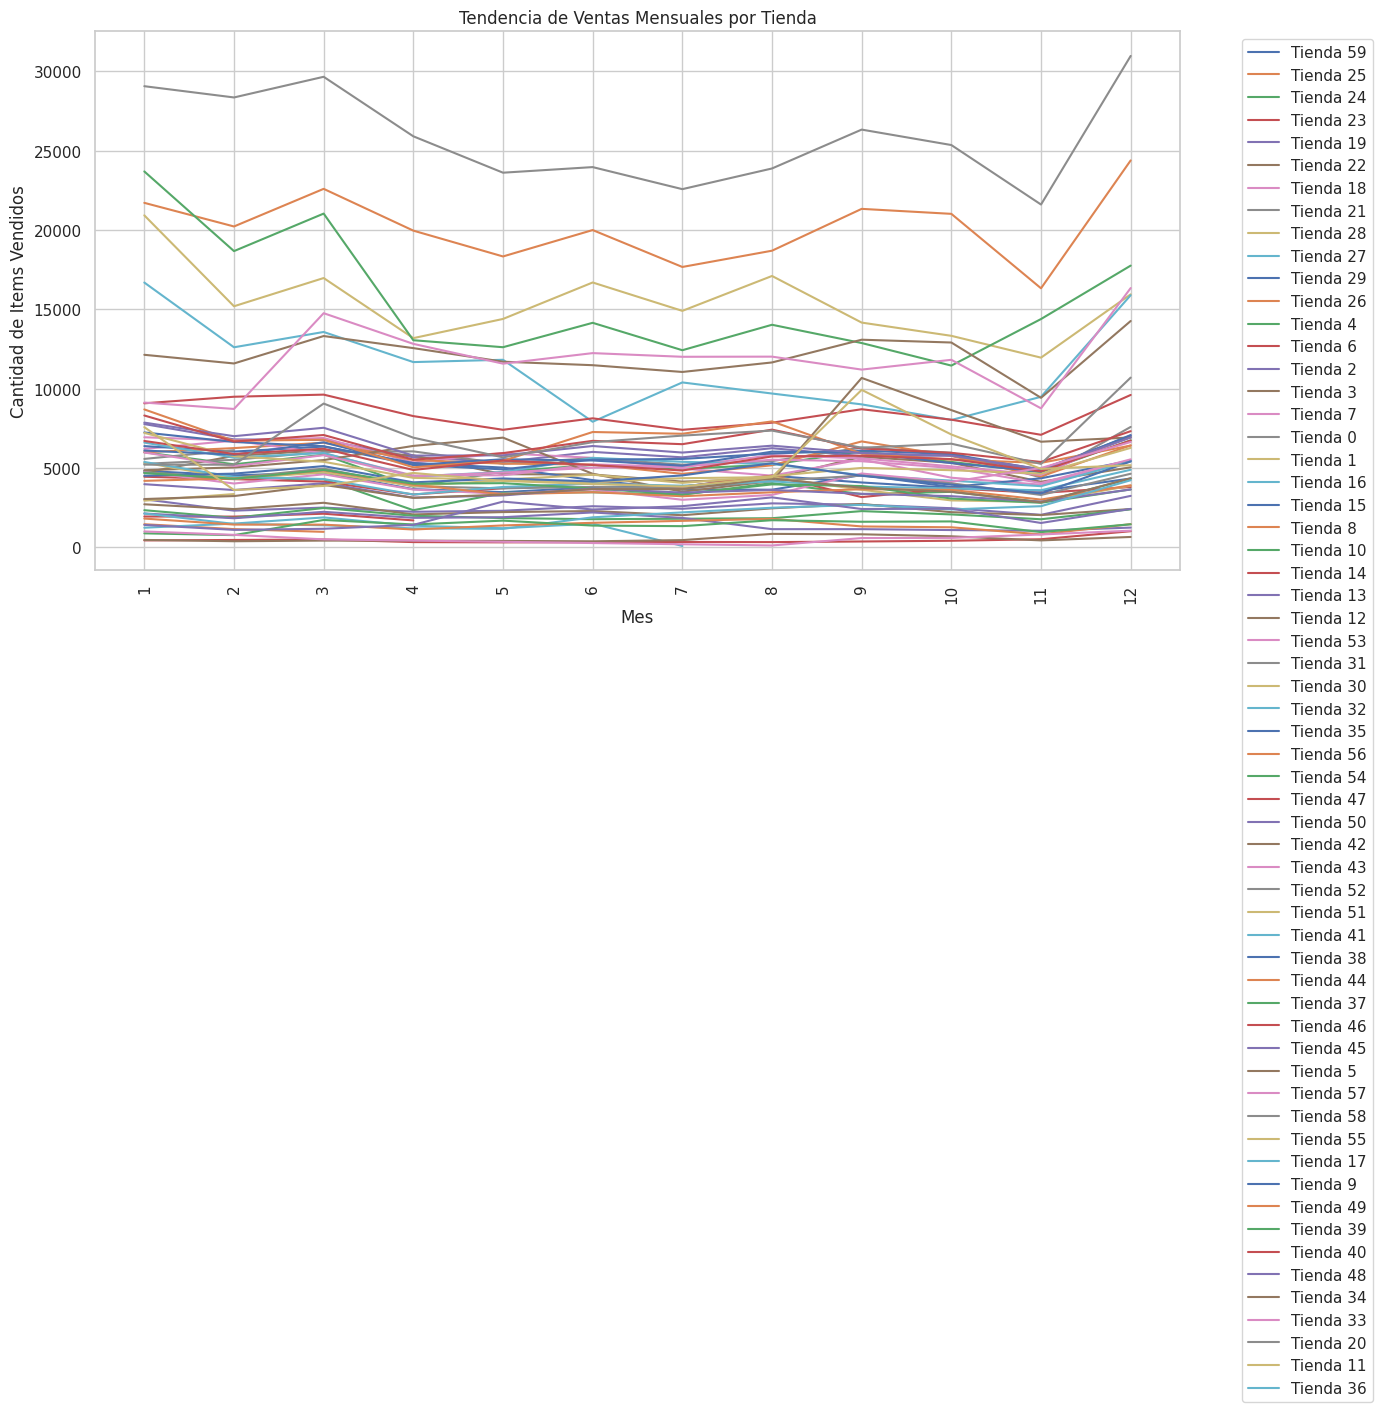

In [ ]:
#Tendencia de ventas mensuales por tienda
monthly_sales = sales_train.groupby(['month', 'shop_id']).agg({'item_cnt_day': 'sum'}).reset_index()

plt.figure(figsize=(14,7))
for shop_id in sales_train['shop_id'].unique():
    shop_sales = monthly_sales[monthly_sales['shop_id'] == shop_id]
    plt.plot(shop_sales['month'].astype(str), shop_sales['item_cnt_day'], label=f'Tienda {shop_id}')
plt.xticks(rotation=90)
plt.title('Tendencia de Ventas Mensuales por Tienda')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Items Vendidos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

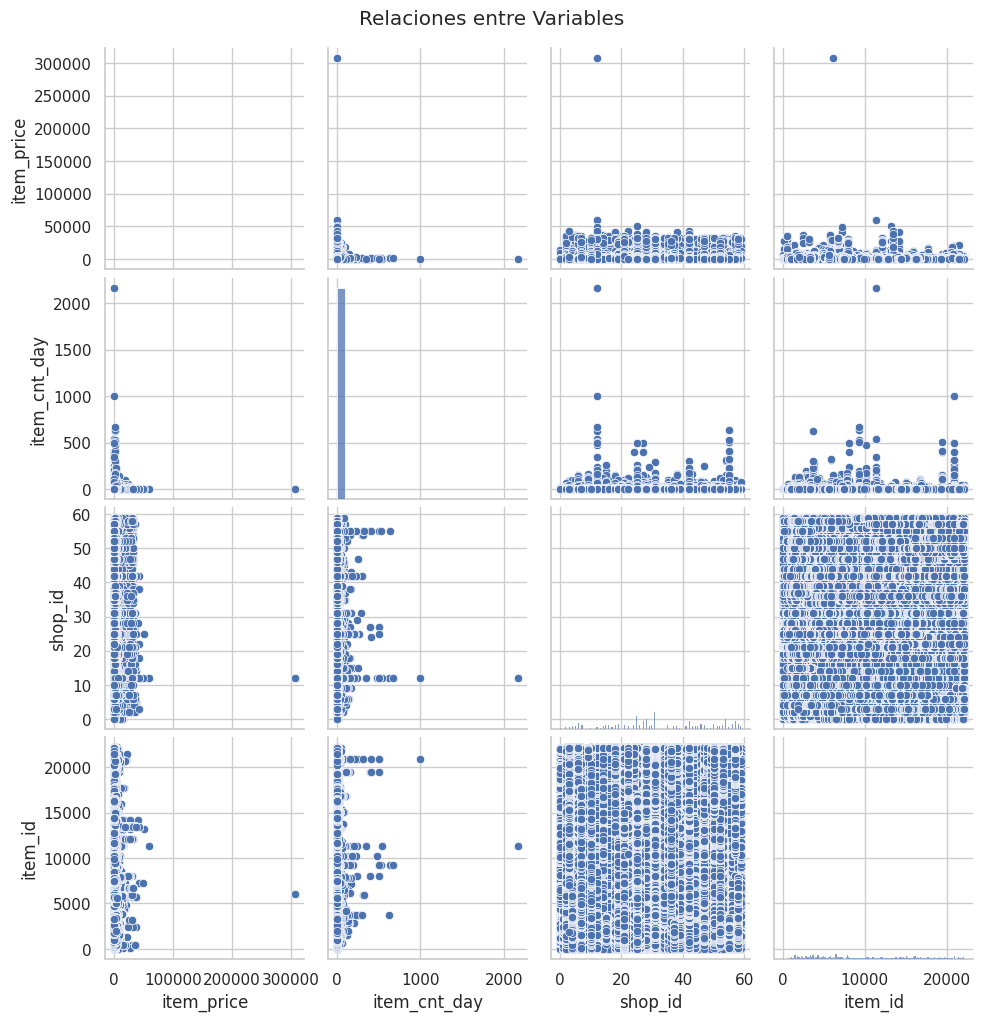

In [ ]:
#Relación entre varias variables
sns.pairplot(sales_train[['item_price', 'item_cnt_day', 'shop_id', 'item_id']])
plt.suptitle('Relaciones entre Variables', y=1.02)
plt.show()

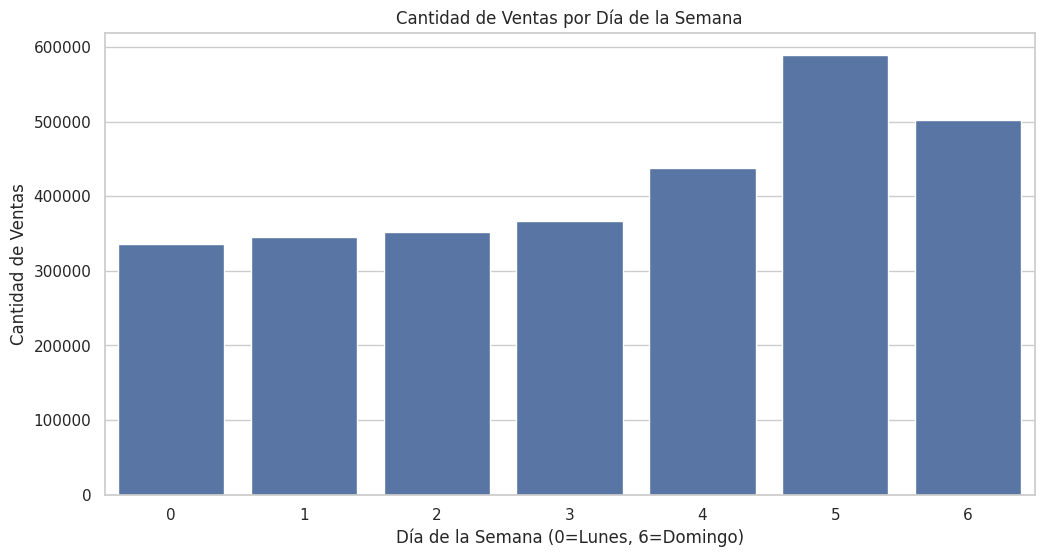

In [ ]:
#Cantidad de ventas por día de la semana
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week', data=sales_train)
plt.title('Cantidad de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Cantidad de Ventas')
plt.show()

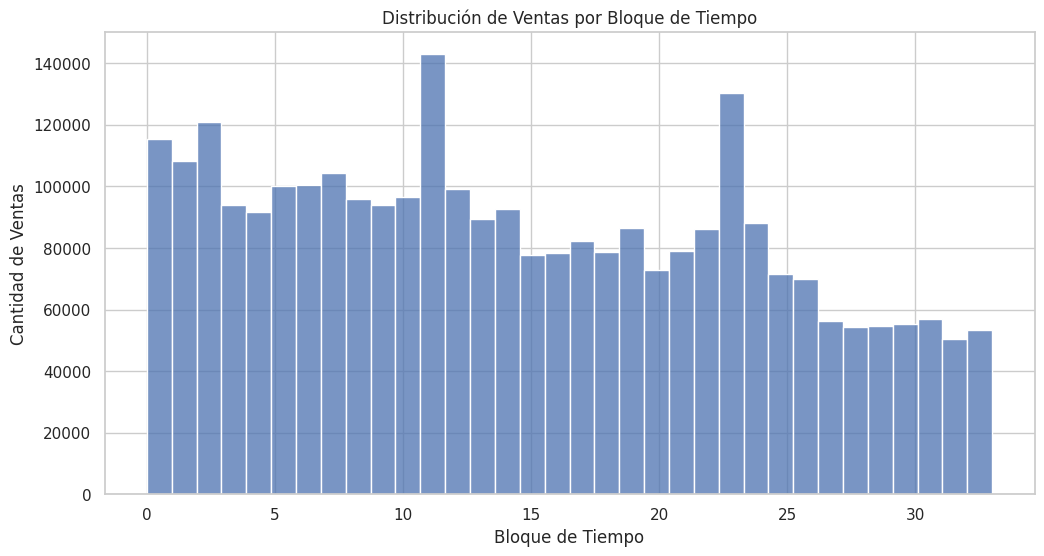

In [ ]:
#Distribución de ventas por bloque de tiempo

plt.figure(figsize=(12,6))
sns.histplot(sales_train['date_block_num'], bins=34, kde=False)
plt.title('Distribución de Ventas por Bloque de Tiempo')
plt.xlabel('Bloque de Tiempo')
plt.ylabel('Cantidad de Ventas')
plt.show()

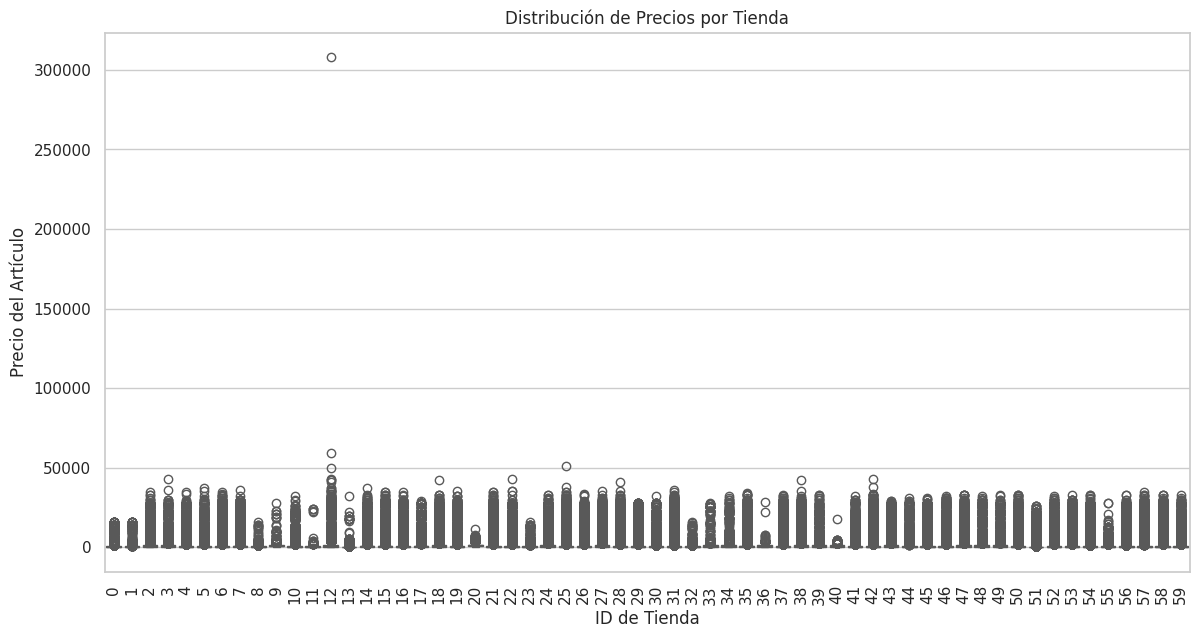

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(x='shop_id', y='item_price', data=sales_train, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de Tienda')
plt.ylabel('Precio del Artículo')
plt.show()

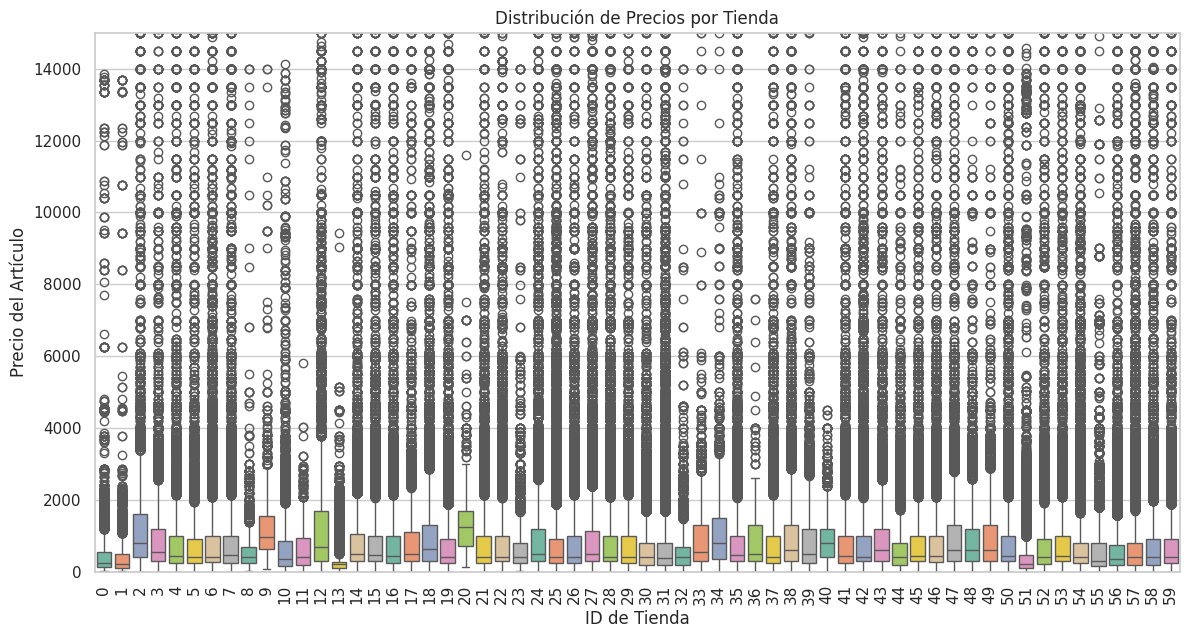

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(x='shop_id', y='item_price', data=sales_train, palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de Tienda')
plt.ylabel('Precio del Artículo')
ax.set_ylim(0, 15000)
plt.show()